Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train loss:2.300338979666401
=== epoch:1, train acc:0.258, test acc:0.261 ===
train loss:2.2964761860908025
train loss:2.2932421229342985
train loss:2.286980000345984
train loss:2.277366486298968
train loss:2.26459265241063
train loss:2.2408349404173284
train loss:2.2560380107642666
train loss:2.212077140624625
train loss:2.182738784184832
train loss:2.1494076462930205
train loss:2.0991046806476885
train loss:2.135138605376161
train loss:2.0467303938502877
train loss:1.988928340672568
train loss:1.9373022573671002
train loss:1.9112301122564026
train loss:1.8275826029373237
train loss:1.7468909590534898
train loss:1.6291324671100818
train loss:1.6389209865703163
train loss:1.495119236232247
trai

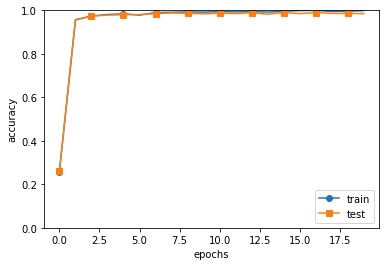

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減  处理花费时间较长的情况下减少数据
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存 # 保存参数
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
